<a href="https://colab.research.google.com/github/ChihuahuaHunter/SDS3201-AssignmentColab/blob/master/Assignment_2_Build_an_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Make sure your compute resource is set to GPU else you'll need to reset your session from scratch**

---
Group yourself to 3 max, and fill in below details
Group member detail(s): \
1. Mohammad Aiman Safwan Bin Abdullah - 21B6004
2. Mohammad Nasiruddin Bin Maslan  - 19b2061
3. Muhammad Luqman Bin A.Azamay - 19b2118

Some of the concepts may be technically advanced, instead, it is to focus on learning how to effectively use Google Colab for scientific research. Don't fret if you dont understand any of codes written for you.

# Setting up Environment

Task 1: Set Up the Environment \
Import the necessary libraries for the exercise, PyTorch for neural network training.\
Load the CIFAR10 dataset.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from google.colab import files
from PIL import Image
# Set the random seed for reproducibility
torch.manual_seed(42)

# Define data transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Load CIFAR10 dataset
batch_size = 64

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

100%|██████████| 170498071/170498071 [00:14<00:00, 12109843.80it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# Set the device to GPU if available, otherwise, use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Define the modified neural network architecture for CIFAR-10
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(8 * 8 * 32, 128)  # Adjusted for CIFAR-10 image size
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Output size matches the number of CIFAR-10 classes (10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 8 * 8 * 32)  # Adjusted for CIFAR-10 image size
        # x = x.view(x.size(0), -1)   # Use for own image
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x
model = SimpleCNN()


Below are the Hyperparameters for the neural network (think of it as knobs that you can tune to enhance performance)


Task 4: Model debugging (Mess around with these 3 hyperparameters) \
hint: \
LEARNING_RATE: The current value is set to 1e10 (10000000000.0). Try adjusting it to find an optimal learning rate.\
BATCH_SIZE: Set it to a power of 2, such as 16, 32, or 64, to potentially improve training efficiency. \
EPOCH: Consider letting the model train for more epochs. The default value is set to 1; experiment with longer training durations for better convergence and performance evaluation.

In [ ]:
BATCH_SIZE = 64
LEARNING_RATE = 1e-3
EPOCH = 100

In [ ]:
# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.to(device)
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0  # Initialize a counter for correct predictions
        total_samples = 0  # Initialize a counter for total samples

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

             # Measure accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calculate accuracy for the current epoch
        accuracy = 100.0 * correct_predictions / total_samples
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy}")
    print("Training complete!")


In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms)

Files already downloaded and verified


In [ ]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
# Create the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

Task 2: Measure performance difference training between GPU and CPU


In [ ]:
# Train the model
import torch
import torch.nn as nn
import torch.optim as optim
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
EPOCHS = 100
train_model(model, train_loader, criterion, optimizer, num_epochs=EPOCHS)



Epoch 1/100, Loss: 2.1429, Accuracy: 22.786
Epoch 2/100, Loss: 1.7935, Accuracy: 36.67
Epoch 3/100, Loss: 1.5738, Accuracy: 44.232
Epoch 4/100, Loss: 1.4246, Accuracy: 49.256
Epoch 5/100, Loss: 1.3336, Accuracy: 52.55
Epoch 6/100, Loss: 1.2614, Accuracy: 55.08
Epoch 7/100, Loss: 1.2029, Accuracy: 57.266
Epoch 8/100, Loss: 1.1564, Accuracy: 59.03
Epoch 9/100, Loss: 1.1097, Accuracy: 60.794
Epoch 10/100, Loss: 1.0644, Accuracy: 62.658
Epoch 11/100, Loss: 1.0255, Accuracy: 63.914
Epoch 12/100, Loss: 0.9851, Accuracy: 65.554
Epoch 13/100, Loss: 0.9480, Accuracy: 66.6
Epoch 14/100, Loss: 0.9153, Accuracy: 67.962
Epoch 15/100, Loss: 0.8817, Accuracy: 69.08
Epoch 16/100, Loss: 0.8528, Accuracy: 70.16
Epoch 17/100, Loss: 0.8214, Accuracy: 71.35
Epoch 18/100, Loss: 0.7918, Accuracy: 72.33
Epoch 19/100, Loss: 0.7652, Accuracy: 73.22
Epoch 20/100, Loss: 0.7404, Accuracy: 74.054
Epoch 21/100, Loss: 0.7126, Accuracy: 75.344
Epoch 22/100, Loss: 0.6851, Accuracy: 76.122
Epoch 23/100, Loss: 0.6619, Ac

Report your findings on:
*   What were the key differences you observed in the training speed between the GPU and CPU?
*   Were there any challenges or limitations you encountered while using the GPU for training?
*   Did you notice any impact on the final model's performance (accuracy, loss) when trained on the GPU versus the CPU?

Hyperparameters used for the model training:

Batch Size: 64

Learning rate: 1e-3

Epoch: 100


Observations:

There is a significant difference in training speed between using the CPU and the GPU. Using the CPU to train the model takes approximately 1hr 13m 30s which is about 4410s. The average training speed is 44.1s per epoch. Meanwhile, using the GPU to train the model yields a far shorter amount of time taken to complete which in this case is only 24m 4s or about 1444s. The average training speed per epoch is noticably shorter as well at about 14.4s per epoch.

There are no considerable challenges observed during the training of the model. On the other hand, using the GPU to train the model returns similar values to using the CPU, however, it is much faster.

The model's performance is not significantly impacted by the training medium. There are recorded fluctuations in both loss and accuracy when training with different mediums however, the fluctuations are not so great to impact the effectiveness of the model.


Task 3: Visualize Loss and Accuracy


Text(0.5, 1.0, 'Accuracy')

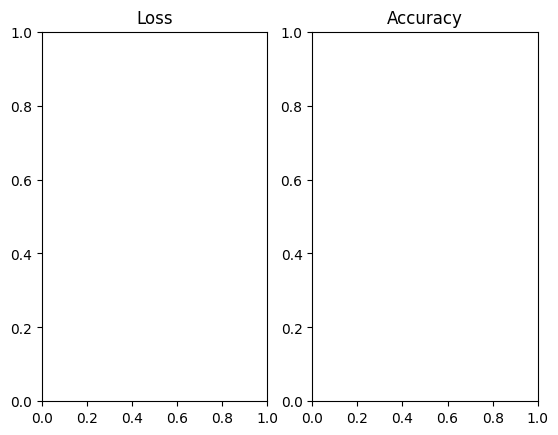

In [1]:
#TODO:
#Your plots goes here
import matplotlib.pyplot as plt
figure, axis = plt.subplots(1,2)

# Epoch
x = range(0,100)

# Loss
# y1 =    #take value for loss
axis[0].set_title('Loss')
# axis[0].plot(x,y1) #plot graph for loss

# Accuracy
# y2 =  #take value for accuracy
axis[1].set_title('Accuracy')
# axis[1].plot(x,y2) #plot graph for accuracy

# x = Epoch [1-100]
# y1 = Loss [2.5 - 0]
# y2 = Accuracy [20 - 100]


Observations:

Task 4: Test your own Image \
You can use the same code from the tutorial and ensure your model is properly trained!



In [2]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize the image to match the model input size
    transforms.ToTensor(),  # Convert the image to a tensor
   transforms.Normalize((0.5,), (0.5,)),  # Normalize the image
])

# Function to preprocess and make predictions on the uploaded image
def predict_uploaded_image(upload):
    # Open the uploaded image
    image = Image.open(upload).convert('RGB')
    model.to("cpu")  # Set the model to evaluation mode

    # Preprocess the image
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

    # Make predictions using the model
    with torch.no_grad():
        output = model(input_batch)
    _, predicted_idx = torch.max(output, 1)

    print(f"Predicted labels: {predicted_idx}")


NameError: ignored

In [ ]:
# Upload an image for prediction
uploaded = files.upload()

# If an image is uploaded, call the prediction function
if len(uploaded) > 0:
    for file_name in uploaded.keys():
        predict_uploaded_image(file_name)
else:
    print("No image uploaded.")
